# Exercise 12.3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time
random.seed(0)
np.random.seed(0)

In [2]:
class BairdMDP:
	def __init__(self):
		self.num_states = 7
	
	def reset(self):
		return np.random.randint(0, self.num_states)

	def transition(self, s, a):
		# Returns: next_state, reward, terminal
		if a == 'dashed':
			next_state = np.random.randint(0, self.num_states - 1)
			return next_state, 0, False
		elif a == 'solid':
			return self.num_states - 1, 0, False
		else:
			raise ValueError('Invalid action')
	
	def possible_next_states(self, s, a):
		return ['dashed', 'solid']

In [3]:
class FunctionApproximator:
	def __init__(self):
		self.features = np.array([[2,0,0,0,0,0,0,1],
								 [0,2,0,0,0,0,0,1],
								 [0,0,2,0,0,0,0,1],
								 [0,0,0,2,0,0,0,1],
								 [0,0,0,0,2,0,0,1],
								 [0,0,0,0,0,2,0,1],
								 [0,0,0,0,0,0,1,2]], dtype=float)
		self.weights = np.array([1, 1, 1, 1, 1, 1, 10, 1], dtype=float)
	
	def predict(self, state):
		return np.dot(self.features[state], self.weights)
	
	def update(self, alpha, is_ratio, reward, state, next_state, gamma):
		v_current = self.predict(state)
		v_next    = self.predict(next_state)
		td_error  = reward + gamma * v_next - v_current
		phi_s = self.features[state]
		self.weights += alpha * is_ratio * td_error * phi_s

In [4]:
def sample_b_policy():
	actions = {'dashed': 6/7, 'solid': 1/7}
	items = list(actions.keys())
	weights = np.array(list(actions.values()), dtype=float)
	action = np.random.choice(items, p=weights)
	return action, actions[action]

def get_pi_policy(action):
	actions = {'dashed': 0, 'solid': 1}
	return actions[action]


In [5]:
steps = 1000
alpha=0.01
gamma=0.99

weight_history = []

mdp = BairdMDP()
fa  = FunctionApproximator()

state = mdp.reset()

for step in range(steps):
	weight_history.append(fa.weights.copy())
	b_action, b_prob = sample_b_policy()
	pi_prob = get_pi_policy(b_action)
	next_state, reward, done = mdp.transition(state, b_action)
	
	is_ratio = pi_prob / b_prob
	fa.update(alpha, is_ratio, reward, state, next_state, gamma)

	if done:
		break
	state = next_state

# Show final weights
print(fa.weights)

[121.0951719  183.64023956 110.52572572 159.91058843 149.17396953
 186.96871478   6.01676181 445.69072858]


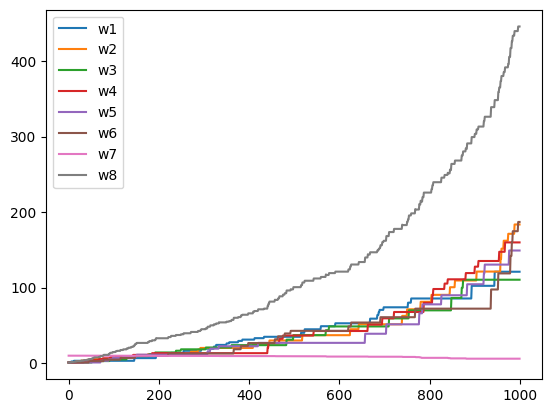

In [6]:
#Plot weights
weight_history = np.array(weight_history)
for i in range(8):
	plt.plot(weight_history[:,i], label=f'w{i+1}')
plt.legend()
plt.show()
